# <center>**TIME SERIES ARMA PROJECT**

### Table of Contents


**A. Time Series**
1. Download Microsoft (MSFT) stock price data for T= 300 business days.
2. Plot the price time series.

**B. Moving Average**

3. Define mathematically the moving average of the price time series with an arbitrary time window t.

4. Compute three moving averages of the price time series, with time windows t = 10, 20, 30.

5. Plot the moving averages against the price time series.

6. Compute the linear and log-return of the price time series.

7. Plot the linear return against the log-return time series.

**C. Time Series Analysis**

8. Define the auto-correlation function (for a stationary time-series).

9. Compute the auto-correlation function (ACF) of the price time series.

10. Plot the price ACF.

11. Compute the partial auto-correlation function (PACF) of the price time series.

12. Plot the price PACF.

13. Compute the auto-correlation function (ACF) of the return time series.

14. Plot the return ACF.

15. Compute the partial auto-correlation function (PACF) of the return time series.

16. Plot the return PACF.

**D. ARMA Models**

17. Define mathematically an ARMA(p, q) model.

18. Define a training and test set and fit an ARMA model to the price time series.

19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set.

20. Plot the price time series vs the ARMA forecast in the test set.

21. Fit an ARMA model to the return time series.

22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set.

23. Plot the return time series vs the ARMA forecast in the test set. 

**E. Gaussianity and Stationarity Test**

24. Introduce mathematically a Gaussianity test.

25. Perform a Gaussianity test of the return time series.

26. Introduce mathematically a stationarity test.

27. Perform a stationarity test of the return time series.



### **A. Time Series**

1. Download a price time series using an API. The length of the time series T, with T = 300.

In [1]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   


The code for this project has been designed to be user-friendly, with user-defined functions that allow easy analysis of potentially all stocks from the yfinance library. By simply changing the stock_name variable, users can automatically update the resulting plots and tables to personalize their analyses. For this coursework, we will focus on analyzing 300 days of Microsoft (MSFT) stock.

In [2]:
%matplotlib inline
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import shapiro, jarque_bera

In [3]:
stock_name = "MSFT"
our_stock = yf.download(stock_name, start="2021-12-3" , end='2023-02-14')
print(len(our_stock))

## The code has been created in a way that any stock from yfinance could be analysed. Only thing the user has to change is the stock_name and all 
## results will automatically update along with the labelling in the plots and the reproduced tables.


[*********************100%***********************]  1 of 1 completed
300


2. Plot the price time series.

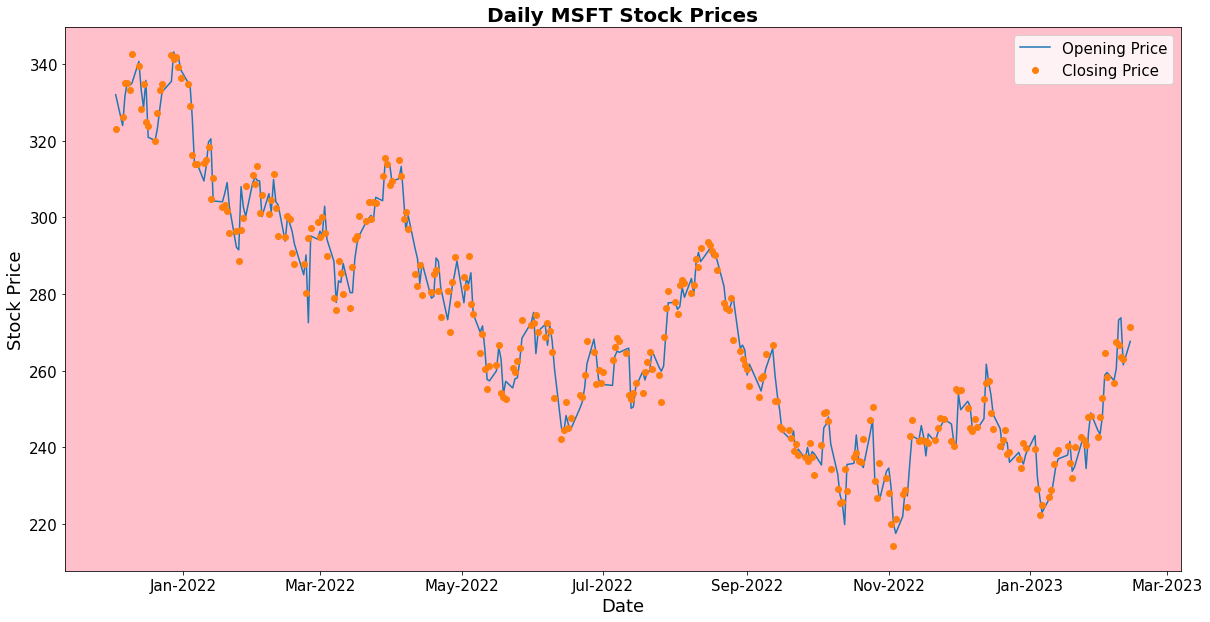

In [4]:
def daily_stock_prices(stock): 

  fig, ax = plt.subplots(figsize=(20, 10))
  ax.plot(stock["Open"])
  ax.plot(stock["Close"],marker="o",linestyle="None") 
  ax.set_facecolor("pink")
  ax.set_title(f'Daily {stock_name} Stock Prices',fontsize=20,weight='bold')
  date_format = mdates.DateFormatter('%b-%Y')
  ax.xaxis.set_major_formatter(date_format)
  ax.set_xlabel("Date",fontsize=18)
  ax.set_ylabel("Stock Price",fontsize=18)
  ax.tick_params(axis='both', labelsize=15)
  ax.legend(["Opening Price","Closing Price"],fontsize=15)
  plt.show()

daily_stock_prices(our_stock)

<br>

### **B. Moving Average**

3. Define mathematically the moving average of the price time series with an arbitrary time window t. 

 (Answered in the report)

4. Compute three moving averages of the price time series, with time windows t = 10, 20, 30.

In [5]:
def compute_moving_average(stock, window):
  return stock.rolling(window).mean()

def value_moving_averages(stock,windows):
  for window in windows:
    stock[f"{window}-MA"] = compute_moving_average(stock["Close"], window)
  return stock

value_moving_averages(our_stock,[10,20,30])


,Open,High,Low,Close,Adj Close,Volume,10-MA,20-MA,30-MA
Date,,,,,,,,,
2021-12-03,331.989990,332.700012,318.029999,323.010010,319.211914,41779300,NaN,NaN,NaN
2021-12-06,323.950012,327.450012,319.230011,326.190002,322.354523,30032600,NaN,NaN,NaN
2021-12-07,331.640015,335.799988,330.100006,334.920013,330.981842,31021900,NaN,NaN,NaN
2021-12-08,335.309998,335.500000,330.799988,334.970001,331.031311,24761000,NaN,NaN,NaN
2021-12-09,334.410004,336.489990,332.119995,333.100006,329.183289,22214200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,252.732001,245.130500,241.223333
2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000,255.344002,247.024500,242.156667
2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100,256.906001,248.417000,243.045333


5. Plot the moving averages against the price time series.

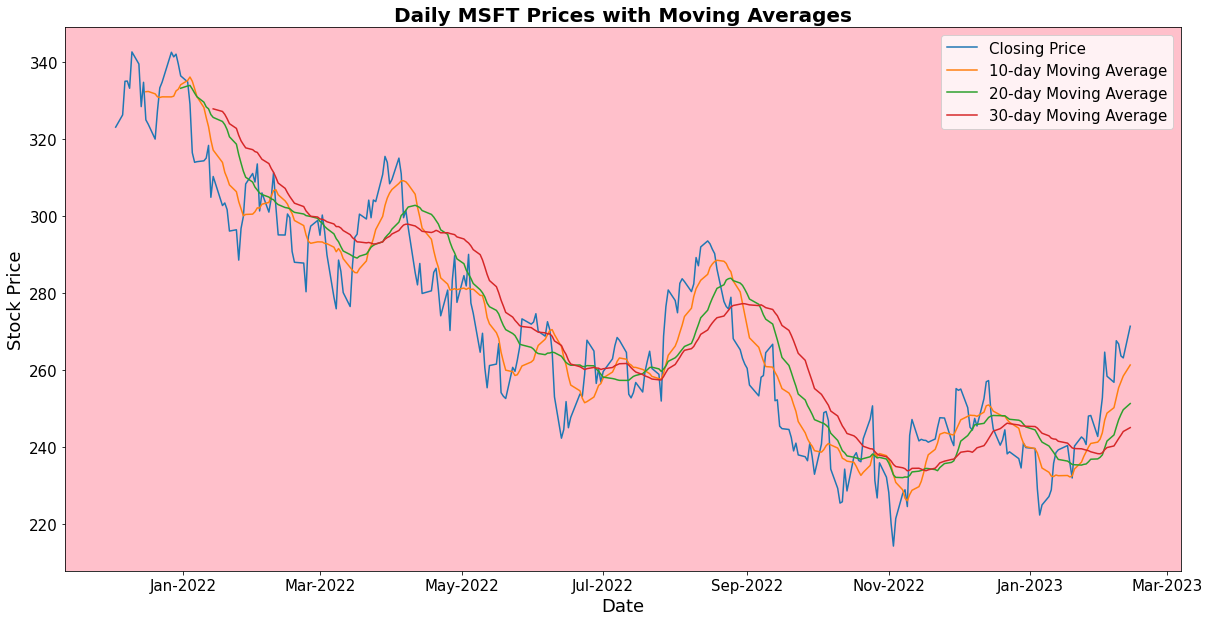

In [7]:
def plot_moving_averages(stock,windows):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(stock["Close"],label="Closing Price")
    for window in windows:
     ax.plot(stock[f"{window}-MA"],label=f"{window}-day Moving Average") #important to run the previous code cell specifically for this code
    ax.set_facecolor("pink")
    ax.set_title(f'Daily {stock_name} Prices with Moving Averages',fontsize=20,weight='bold')
    date_format = mdates.DateFormatter('%b-%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel("Date",fontsize=18)
    ax.set_ylabel("Stock Price",fontsize=18)
    ax.tick_params(axis='both', labelsize=15) 
    ax.legend(fontsize=15)
    plt.show()

plot_moving_averages(our_stock,[10,20,30])
    

6. Compute the linear and log-return of the price time series.

In [6]:
our_stock["Linear Return"] = our_stock["Close"].pct_change()
our_stock["Log Return"] = np.log(our_stock["Close"]/our_stock["Close"].shift(1))

our_stock[["Close", "Linear Return", "Log Return"]]

,Close,Linear Return,Log Return
Date,,,
2021-12-03,323.010010,NaN,NaN
2021-12-06,326.190002,0.009845,0.009797
2021-12-07,334.920013,0.026764,0.026412
2021-12-08,334.970001,0.000149,0.000149
2021-12-09,333.100006,-0.005583,-0.005598
...,...,...,...
2023-02-07,267.559998,0.042022,0.041163
2023-02-08,266.730011,-0.003102,-0.003107
2023-02-09,263.619995,-0.011660,-0.011728


7. Plot the linear return against the log-return time series.

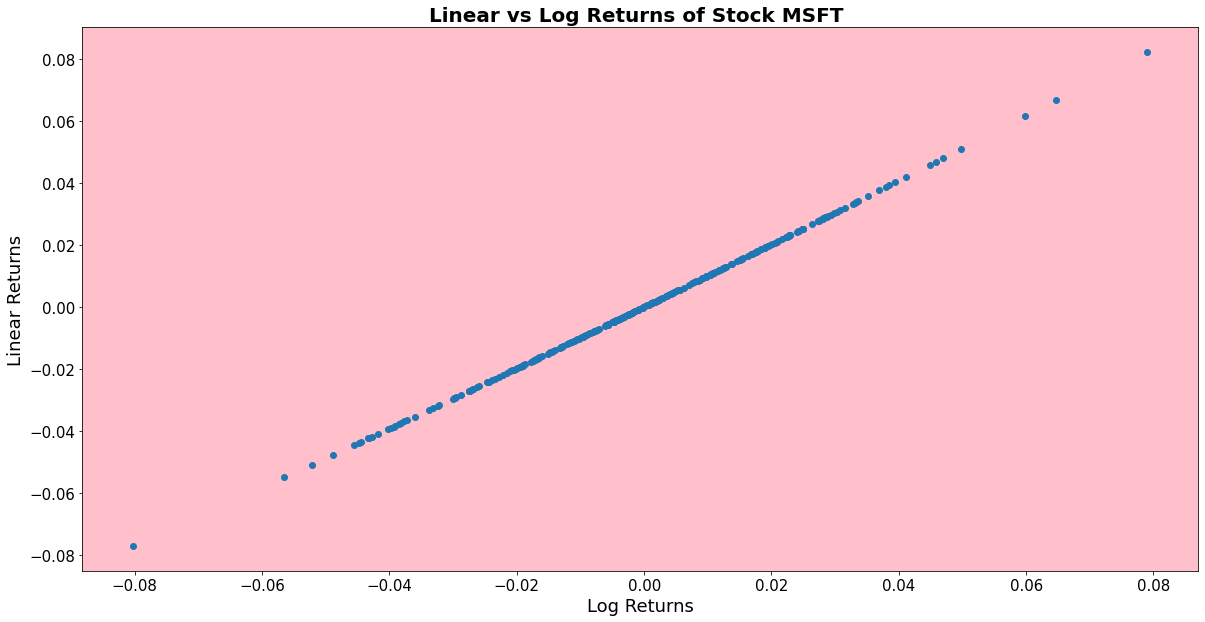

In [29]:
def plot_linear_log_returns(stock):
  
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.plot()
  ax.plot(stock["Log Return"],stock["Linear Return"],marker="o",linestyle="None")
  ax.set_facecolor("pink")
  ax.set_title(f'Linear vs Log Returns of Stock {stock_name} ',fontsize=20,weight='bold')
  ax.set_ylabel("Linear Returns",fontsize=18)
  ax.set_xlabel("Log Returns",fontsize=18)
  ax.tick_params(axis='both', labelsize=15)
  plt.show()

plot_linear_log_returns(our_stock)


<br>

### **C. Time Series Analysis**

8. Define the auto-correlation function (for a stationary time-series).

 (Answered in the report)

*NOTE: As our original price time series was non-stationary, we have used differencing in order to make it a stationary price time series.*

In [9]:
#Making our price time series stationary 
from statsmodels.tsa.stattools import adfuller
our_stock['first_diff'] = our_stock['Close'] - our_stock['Close'].shift(1)

result = adfuller(our_stock['first_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#Hence, as ADF is less than 1% critical value, the updated price time series is now stationary. 


ADF Statistic: -11.211657
p-value: 0.000000


9. Compute the auto-correlation function (ACF) of the price time series.

In [10]:
def compute_acf_stock(stock): 
 return statsmodels.tsa.stattools.acf(stock['first_diff'].dropna())

compute_acf_stock(our_stock)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.02336099, -0.07566379, -0.06322946,  0.02910385,
        0.04180482, -0.11020652,  0.00641733, -0.07155489,  0.08805041,
       -0.02887818, -0.06161538, -0.0168543 ,  0.07963165,  0.01731989,
       -0.07302238, -0.02872206, -0.04975534,  0.04563805,  0.05280119,
       -0.01173579,  0.0553929 , -0.01945134, -0.05073681, -0.01704742,
        0.02015271,  0.01038217, -0.02425365,  0.02492447,  0.00498149,
       -0.05887872, -0.02532839, -0.13421299,  0.02228789,  0.09088663,
        0.02746601, -0.02715938, -0.06377353, -0.02950488, -0.06093753,
        0.00213931])

10. Plot the price ACF.

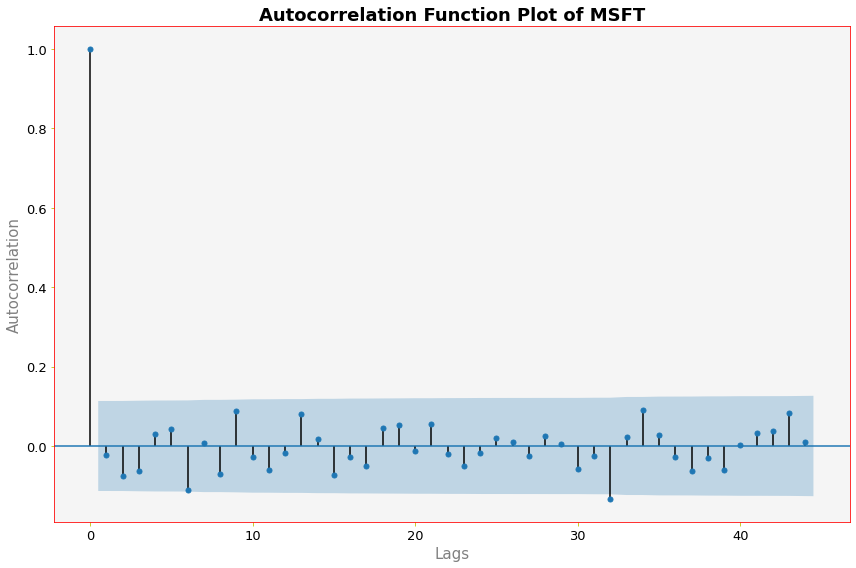

In [11]:
#As per the future warning for the default no. of lags we received in the above result, we choose min(44,229) i.e. 44 lags

def plot_acf_stock(stock, lags=44):
  fig, ax = plt.subplots(figsize=(12,8))
  plot_acf(stock['first_diff'].dropna(), lags=lags, ax=ax)
  ax.set_title("Autocorrelation Function Plot of MSFT", fontsize=18, fontweight='bold')
  ax.set_xlabel("Lags", fontsize=15)
  ax.set_ylabel("Autocorrelation", fontsize=15)
  ax.spines['bottom'].set_color('r')
  ax.spines['top'].set_color('r')
  ax.spines['right'].set_color('r')
  ax.spines['left'].set_color('r')
  ax.yaxis.label.set_color('gray')
  ax.xaxis.label.set_color('gray')
  ax.tick_params(axis='both', which='major', labelsize=13, color='y')
  ax.set_facecolor("#f5f5f5")
  plt.tight_layout()
  plt.show()

plot_acf_stock(our_stock)


11. Compute the partial auto-correlation function (PACF) of the price time series.

In [12]:
def compute_pacf_stock(stock):
 return statsmodels.tsa.stattools.pacf(stock['first_diff'].dropna())

compute_pacf_stock(our_stock)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        , -0.02343938, -0.07676489, -0.06803018,  0.0202031 ,
        0.03419194, -0.11213119,  0.00963158, -0.08731752,  0.0737512 ,
       -0.03548334, -0.05697465, -0.02571644,  0.07639702, -0.012824  ,
       -0.04538663, -0.03549274, -0.06600945,  0.01550136,  0.06275065,
       -0.00593703,  0.078083  , -0.03371954, -0.07496489,  0.00107868,
        0.01602315, -0.00465887, -0.00992134,  0.0198549 ,  0.01226832,
       -0.07004739, -0.03520541, -0.17812147,  0.00280278,  0.07646311,
        0.03526147,  0.01121934, -0.06944185, -0.11475578, -0.10560381,
       -0.04095879])

12. Plot the price PACF.

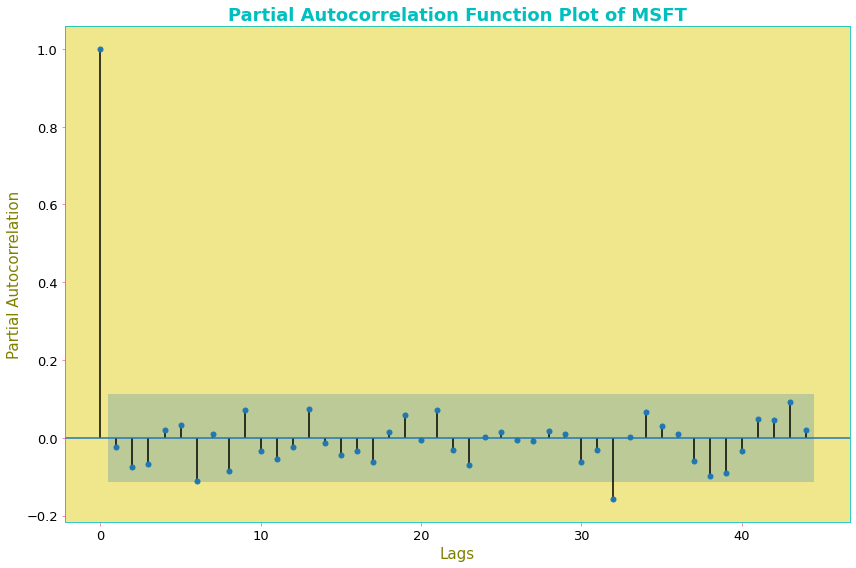

In [13]:
def plot_pacf_stock(stock, lags=44):
    fig, ax = plt.subplots(figsize=(12,8))
    plot_pacf(stock['first_diff'].dropna(), lags=lags, ax=ax, method='ywmle')
    ax.set_title("Partial Autocorrelation Function Plot of MSFT", fontsize=18, fontweight='bold', color="c")
    ax.set_xlabel("Lags", fontsize=15)
    ax.set_ylabel("Partial Autocorrelation", fontsize=15)
    ax.spines['bottom'].set_color('c')
    ax.spines['top'].set_color('c')
    ax.spines['right'].set_color('c')
    ax.spines['left'].set_color('c')
    ax.yaxis.label.set_color('#808000')
    ax.xaxis.label.set_color('#808000')
    ax.tick_params(axis='both', which='major', labelsize=13, color='#FF69B4')
    ax.set_facecolor("#F0E68C")
    plt.tight_layout()
    plt.show()

plot_pacf_stock(our_stock)


13. Compute the auto-correlation function (ACF) of the return time series.

In [14]:
def compute_acf_returns(stock): 
 return statsmodels.tsa.stattools.acf(stock["Log Return"].dropna())

compute_acf_returns(our_stock)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00, -1.01149872e-02, -9.84163357e-02, -7.32712392e-02,
        2.61505299e-02,  4.75588233e-02, -9.67744824e-02, -1.29313886e-02,
       -5.50150148e-02,  9.74778702e-02, -3.50748884e-02, -7.88485130e-02,
       -2.09998679e-02,  9.57405280e-02,  9.42111987e-03, -6.93527883e-02,
       -1.89764833e-02, -3.33979988e-02,  6.66037157e-02,  4.42918370e-02,
       -1.71552138e-02,  4.62389451e-02, -2.36504456e-02, -4.81369059e-02,
       -4.14348856e-02,  2.24318175e-02,  6.32039788e-03, -1.66495957e-02,
        3.62103833e-02,  5.50440979e-03, -6.12021999e-02, -1.76539961e-02,
       -1.31680297e-01, -8.21629560e-06,  9.80537580e-02,  3.38752295e-02,
       -2.50477720e-02, -6.32155758e-02, -4.06991816e-02, -6.53907029e-02,
       -6.77706804e-04])

14. Plot the return ACF.

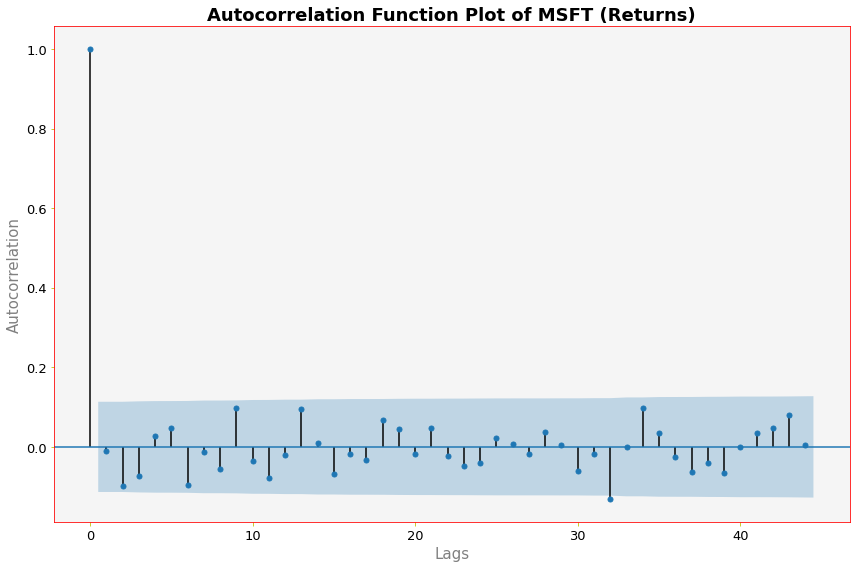

In [15]:
def plot_acf_returns(stock, lags=44):
  fig, ax = plt.subplots(figsize=(12,8))
  plot_acf(stock["Log Return"].dropna(), lags=lags, ax=ax)
  ax.set_title("Autocorrelation Function Plot of MSFT (Returns)", fontsize=18, fontweight='bold')
  ax.set_xlabel("Lags", fontsize=15)
  ax.set_ylabel("Autocorrelation", fontsize=15)
  ax.spines['bottom'].set_color('r')
  ax.spines['top'].set_color('r')
  ax.spines['right'].set_color('r')
  ax.spines['left'].set_color('r')
  ax.yaxis.label.set_color('gray')
  ax.xaxis.label.set_color('gray')
  ax.tick_params(axis='both', which='major', labelsize=13, color='y')
  ax.set_facecolor("#f5f5f5")
  plt.tight_layout()
  plt.show()

plot_acf_returns(our_stock)


15. Compute the partial auto-correlation function (PACF) of the return time series.

In [16]:
def compute_pacf_returns(stock): 
 return statsmodels.tsa.stattools.pacf(stock["Log Return"].dropna())

compute_pacf_returns(our_stock)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        , -0.01014893, -0.09919229, -0.07689021,  0.01465316,
        0.03465143, -0.10061804, -0.00549254, -0.07186934,  0.08291459,
       -0.04807557, -0.06862221, -0.02727519,  0.08407317, -0.02355363,
       -0.04014927, -0.01688889, -0.05134031,  0.03665582,  0.05633629,
       -0.00415091,  0.0712514 , -0.04584314, -0.06207071, -0.01990268,
        0.01610875, -0.01585861, -0.01270341,  0.03801293,  0.01565512,
       -0.07662582, -0.02006672, -0.17762366, -0.0142168 ,  0.07391477,
        0.03529538,  0.00426649, -0.06443819, -0.11669663, -0.11497952,
       -0.04172598])

16. Plot the return PACF.

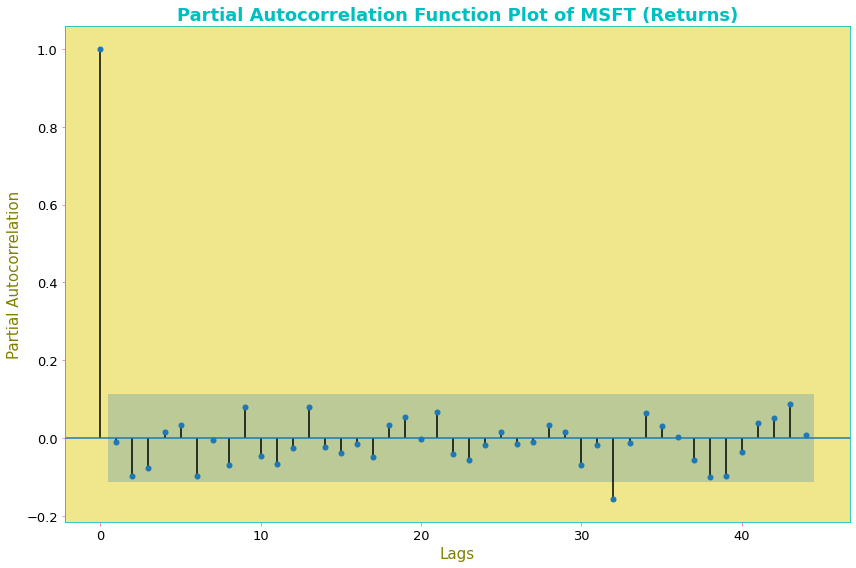

In [17]:
def plot_pacf_returns(stock, lags=44):
    fig, ax = plt.subplots(figsize=(12,8))
    plot_pacf(stock["Log Return"].dropna(), lags=lags, ax=ax, method='ywmle')
    ax.set_title("Partial Autocorrelation Function Plot of MSFT (Returns)", fontsize=18, fontweight='bold', color="c")
    ax.set_xlabel("Lags", fontsize=15)
    ax.set_ylabel("Partial Autocorrelation", fontsize=15)
    ax.spines['bottom'].set_color('c')
    ax.spines['top'].set_color('c')
    ax.spines['right'].set_color('c')
    ax.spines['left'].set_color('c')
    ax.yaxis.label.set_color('#808000')
    ax.xaxis.label.set_color('#808000')
    ax.tick_params(axis='both', which='major', labelsize=13, color='#FF69B4')
    ax.set_facecolor("#F0E68C")
    plt.tight_layout()
    plt.show()

plot_pacf_returns(our_stock)


<br>

### **D. ARMA  Models**

17. Define mathematically an ARMA(p, q) model.

 (Answered in the report)

*We will utilize the stationary price time series again, as we did in the previous section for computing and plotting our autocorrelation function (ACF) and partial autocorrelation function (PACF) values.*

18. Define a training and test set and fit an ARMA model to the price time series.

In [18]:
price_MSFT = our_stock['first_diff'].dropna()
train = price_MSFT[:230]  
test = price_MSFT[230:] 

#ARMA Model Selection 
p=1
q=1
model = sm.tsa.ARMA(train, order = (p, q))
model_fit = model.fit()
model_fit.summary() 


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             first_diff   No. Observations:                  230
Model:                     ARMA(1, 1)   Log Likelihood                -733.781
Method:                       css-mle   S.D. of innovations              5.849
Date:                Sun, 19 Feb 2023   AIC                           1475.563
Time:                        16:14:57   BIC                           1489.315
Sample:                             0   HQIC                          1481.110
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3960      0.060     -6.597      0.000      -0.514      -0.278
ar.L1.first_diff     0.9157      0.028     32.524      0.000       0.861       0.971
ma.L1.first_diff    -1.0000      0.012    -82.259      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0921           +0.0000j            1.0921            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

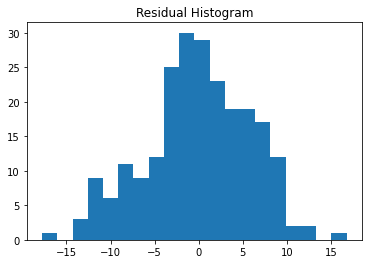

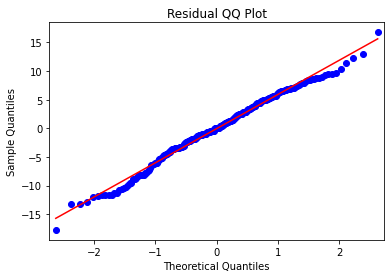

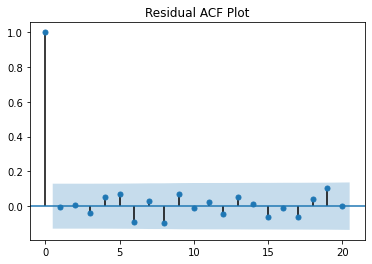

In [19]:
#In order to show that ARMA(1,1) is an appropriate model, we run these diagnostic plots

# generate residuals
residuals = model_fit.resid

# plot residual histogram
plt.hist(residuals, bins=20)
plt.title("Residual Histogram")
plt.show()

# plot QQ plot
sm.qqplot(residuals, line='r')
plt.title("Residual QQ Plot")
plt.show()

# plot residual ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title("Residual ACF Plot")
plt.show()


19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set.

In [20]:
# ARMA model parameters
print('Model Parameters:')
print(model_fit.params) 
print("")

# Compute MSE for training set
train_pred = model_fit.predict(start=0, end=len(train)-1)
train_mse = mean_squared_error(train, train_pred)
print(f'Training set MSE: {train_mse:.4f}')
print("")

# Compute MSE for test set
test_pred = model_fit.predict(start=len(train), end=len(price_MSFT)-1)
test_mse = mean_squared_error(test, test_pred)
print(f'Test set MSE: {test_mse:.4f}')
print("")


Model Parameters:
const              -0.396034
ar.L1.first_diff    0.915701
ma.L1.first_diff   -0.999986
dtype: float64

Training set MSE: 34.5733

Test set MSE: 29.0904



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


20. Plot the price time series vs the ARMA forecast in the test set.

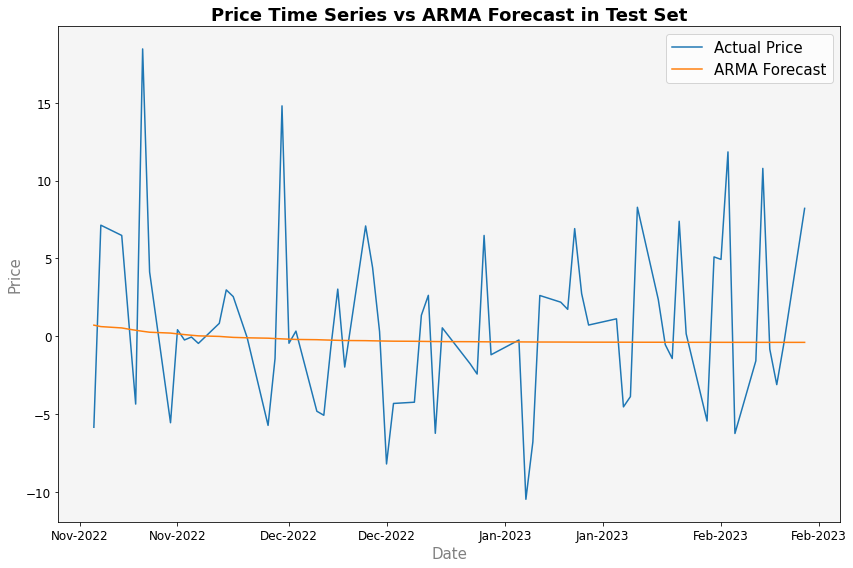

In [21]:
# Plot the price time series and the ARMA forecast in the test set
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(test.index, test, label="Actual Price")
ax.plot(test.index, test_pred, label="ARMA Forecast")
ax.set_title("Price Time Series vs ARMA Forecast in Test Set", fontsize=18, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Price", fontsize=15)
ax.legend(fontsize=15)
date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.yaxis.label.set_color('gray')
ax.xaxis.label.set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("#f5f5f5")
plt.tight_layout()
plt.show()

21. Fit an ARMA model to the return time series.

In [22]:
return_MSFT = our_stock['Log Return'].dropna()  
train = return_MSFT[:230]  
test = return_MSFT[230:] 
 
#Model Selection
p=1
q=1
model = sm.tsa.ARMA(train, order = (p, q))
model_fit = model.fit()
model_fit.summary() 


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Log Return   No. Observations:                  230
Model:                     ARMA(1, 1)   Log Likelihood                 557.287
Method:                       css-mle   S.D. of innovations              0.021
Date:                Sun, 19 Feb 2023   AIC                          -1106.574
Time:                        16:16:49   BIC                          -1092.822
Sample:                             0   HQIC                         -1101.027
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0014      0.000     -6.652      0.000      -0.002      -0.001
ar.L1.Log Return     0.9138      0.029     31.693      0.000       0.857       0.970
ma.L1.Log Return    -1.0000      0.012    -82.888      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0943           +0.0000j            1.0943            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

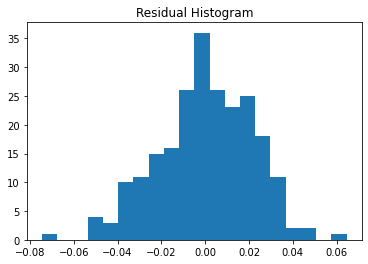

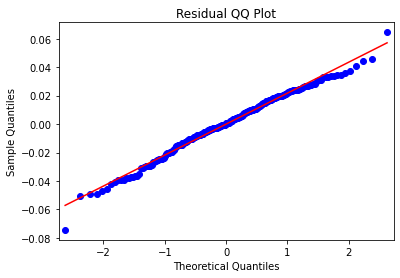

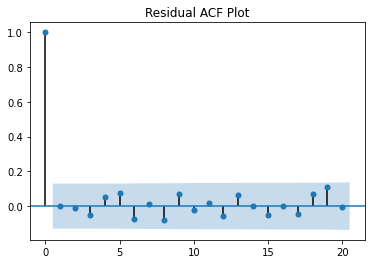

In [23]:
#In order to show that ARMA(1,1) is an appropriate model, we run these diagnostic plots

# generate residuals
residuals = model_fit.resid

# plot residual histogram
plt.hist(residuals, bins=20)
plt.title("Residual Histogram")
plt.show()

# plot QQ plot
sm.qqplot(residuals, line='r')
plt.title("Residual QQ Plot")
plt.show()

# plot residual ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title("Residual ACF Plot")
plt.show()

22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set.

In [24]:
# ARMA model parameters
print('Model Parameters:')
print(model_fit.params) 
print("")

# Compute MSE for training set
train_pred = model_fit.predict(start=0, end=len(train)-1)
train_mse = mean_squared_error(train, train_pred)
print(f'Training set MSE: {train_mse:.4f}')
print("")

# Compute MSE for test set
test_pred = model_fit.predict(start=len(train), end=len(return_MSFT)-1)
test_mse = mean_squared_error(test, test_pred)
print(f'Test set MSE: {test_mse:.4f}')
print("")

Model Parameters:
const              -0.001432
ar.L1.Log Return    0.913793
ma.L1.Log Return   -0.999990
dtype: float64

Training set MSE: 0.0005

Test set MSE: 0.0005



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


23. Plot the return time series vs the ARMA forecast in the test set. 

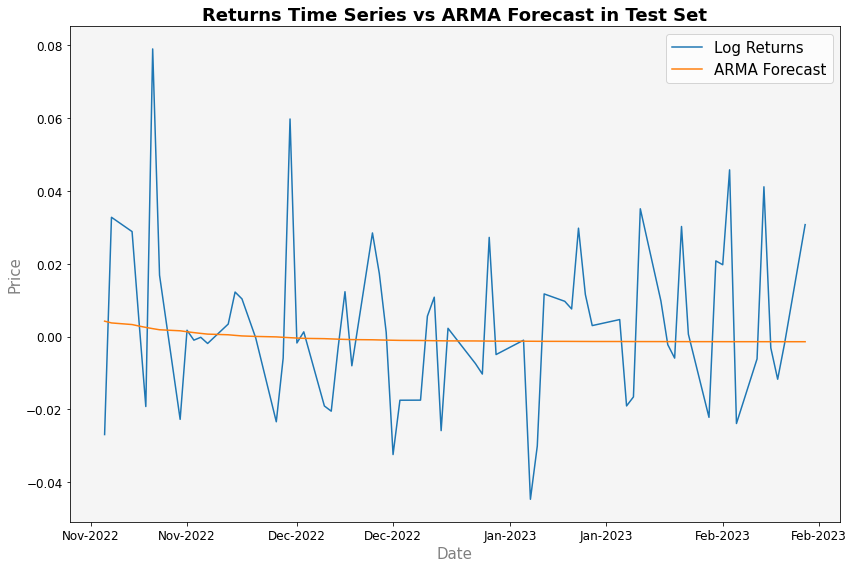

In [25]:
# Plot the price time series and the ARMA forecast in the test set
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(test.index, test, label="Log Returns")
ax.plot(test.index, test_pred, label="ARMA Forecast")
ax.set_title("Returns Time Series vs ARMA Forecast in Test Set", fontsize=18, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Price", fontsize=15)
ax.legend(fontsize=15)
date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.yaxis.label.set_color('gray')
ax.xaxis.label.set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("#f5f5f5")
plt.tight_layout()
plt.show()

<br>

### **E. Gaussianity and Stationarity Test**

24. Introduce mathematically a Gaussianity test.

 (Answered in the report)

25. Perform a Gaussianity test of the return time series.

**GAUSSIANITY TESTS OF THE RETURN TIME SERIES**

It is generally a good idea to use multiple tests to confirm the normality of a distribution. So we will be looking at:

1. Shapiro-Wilk Test
2. Jarque-Bera Test


In [26]:
# PERFORM A GAUSSIANITY TEST OF THE RETURN TIME SERIES

#1. Shapiro-Wilk Test

stat, p = shapiro(return_MSFT)
print('\nShapiro-Wilk test p-value:', p,"\n")
#Observation: p-value = 0.32 > 0.05 - follows normality


#2. Jarque-Bera Test
jb_value, p_value = jarque_bera(return_MSFT)
print(f"Jarque-Bera Test p-value: {p_value}\n")
#Observation: p-value slightly higher than 0.05 - follows normality

#From both tests we can conclude that our log returns of MSFT are distributed in a normal Gaussian way



Shapiro-Wilk test p-value: 0.3381345868110657 

Jarque-Bera Test p-value: 0.06188559816298422



26. Introduce mathematically a stationarity test.
 
 (Answered in the report)

27. Perform a stationarity test of the return time series.

**STATIONARITY TESTS OF THE RETURN TIME SERIES**

It is generally a good idea to use multiple tests to also confirm the stationarity of a distribution. So we will be looking at:
1. ADF test
2. KPSS test


In [28]:
# Perform ADF test
result = adfuller(return_MSFT)

# Extract and print test results
print('ADF Statistic:', result[0])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Interpret test results
if result[0] < result[4]['1%']:
    print('ADF statistic is less than 1% critical value => Stationary')
elif result[0] < result[4]['5%']:
    print('ADF statistic is less than 5% critical value => Stationary')
elif result[0] < result[4]['10%']:
    print('ADF statistic is less than 10% critical value => Stationary')
else:
    print('ADF statistic is greater than all critical values => Non-stationary')

# OBSERVATION: If the ADF statistic is less than the 1% critical value and the significance level is 0.05, it means that the null hypothesis 
# of the Augmented Dickey-Fuller test (which is that the time series is non-stationary) can be rejected. This indicates that there is evidence 
# to support that the time series is stationary.


kpss_stat, p_value, lags, crit_value = kpss(return_MSFT)

print(f"\np-value from KPSS Test: {p_value}\n")

# OBSERVATION: As the p-value is even greater than 0.1 that means it is more than our significance level (0.05), thus we fail to reject the null hypothesis and 
# cannot conclude that the time series is non-stationary. 

#Thus, from both ADF and KPSS tests, we conclude that our log returns follow stationarity

ADF Statistic: -11.40361708729631
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
ADF statistic is less than 1% critical value => Stationary

p-value from KPSS Test: 0.1



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
